In [43]:
import pandas as pd
import matplotlib.pyplot as plt

**Customer Demographic**

In [2]:
demographics = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic",header=1,dtype={'DOB': 'datetime64[ns]'})
demographics.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
demographics.shape

(4000, 13)

In [4]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
demographics.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [6]:
#checking for duplicate entries
demographics.duplicated(subset=['first_name','last_name','DOB']).any()

False

In [7]:
demographics.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [8]:
demographics.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

It can be observed that the gender formats are not uniform, so making it uniform

In [9]:
demographics.gender = demographics.gender.replace('U','Unknown').replace('F','Female').replace('Femal','Female').replace('M','Male')

In [10]:
demographics.default.head()

0                                                   "'
1                         <script>alert('hi')</script>
2                                  2018-02-01 00:00:00
3    () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                  NIL
Name: default, dtype: object

The column 'default' don't hold any meaniningful data, so dropping that field

In [11]:
demographics = demographics.drop('default', axis=1)

In [12]:
demographics.job_title.value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [13]:
demographics.job_industry_category.value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [14]:
demographics.owns_car.value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [15]:
demographics.DOB.describe()

C:\Users\sadar\AppData\Local\Temp\ipykernel_17568\3163447261.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  demographics.DOB.describe()


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

**Customer Addresses**

In [16]:
addresses = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress",header=1,dtype={'DOB': 'datetime64[ns]'})
addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [17]:
addresses.shape

(3999, 6)

In [18]:
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [19]:
#checking for duplicate entries
addresses.duplicated(subset=['address','postcode']).any()

False

In [20]:
addresses.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [21]:
addresses.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

**Transaction data in the past three months**

In [22]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions",header=1,dtype={'transaction_date': 'datetime64[ns]'})
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [23]:
transactions.shape

(20000, 13)

In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

It can be noticed that product_product_first_sold_date is in float format

In [25]:
#Checking first few values of product_product_first_sold_date
transactions.product_first_sold_date.head()

0    41245.0
1    41701.0
2    36361.0
3    36145.0
4    42226.0
Name: product_first_sold_date, dtype: float64

Need clarification from the seller about the product_product_first_sold_date feature because expected date-time format but, the values are in float.

In [26]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

There are missing values for the features "online_order","brand", "product_line", "product_class", "product_size", "standard_cost", "product_first_sold_date"

In [27]:
transactions.query('online_order.isnull()')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


Not much can be inferred from the data where online_order field is empty

In [28]:
transactions.query('brand.isnull()')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


From this table we can say that the missing values at "brand", "product_line", "product_class", "product_size", "standard_cost", "product_first_sold_date", are the entries where product_id is 0. So removing such entries should not be harmful.

In [29]:
transactions['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [30]:
transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [31]:
transactions.query('order_status == "Cancelled"')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
42,43,76,488,2017-03-17,0.0,Cancelled,WeareA2B,Standard,low,medium,642.31,513.85,41922.0
138,139,32,2073,2017-03-25,0.0,Cancelled,Giant Bicycles,Standard,high,medium,1179.00,707.40,36833.0
249,250,48,1454,2017-11-25,0.0,Cancelled,WeareA2B,Standard,medium,medium,1762.96,950.52,35470.0
254,255,67,2801,2017-04-01,1.0,Cancelled,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
583,584,43,1019,2017-09-13,1.0,Cancelled,Solex,Standard,medium,medium,1151.96,649.49,34071.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,19406,79,1860,2017-05-29,0.0,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,42218.0
19409,19410,79,1771,2017-01-15,0.0,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,42226.0
19822,19823,3,2312,2017-12-02,0.0,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,36361.0
19957,19958,56,2013,2017-06-04,1.0,Cancelled,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0


In [32]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [33]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [34]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [35]:
demographics.shape

(4000, 12)

In [36]:
addresses.shape

(3999, 6)

In [120]:
#Merging the demographis and addresses 
merged_df = pd.merge(demographics, addresses, on='customer_id', how='outer', indicator=True)


In [121]:
merged_df.shape

(4003, 18)

In [122]:
merged_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,_merge
0,1,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,both
1,2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,both
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,left_only
3,4,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,both
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,both


In [123]:
# Filter the merged DataFrame to show only rows where the data is missing in sheet 2
missing_data = merged_df[merged_df['_merge'] == 'left_only']

In [124]:
#Converting DOB to ages
merged_df['age'] = (pd.Timestamp('now') - merged_df['DOB']).astype('<m8[Y]')

In [125]:
merged_df['age'].isnull().sum()

90

In [126]:
#checking the max value
merged_df['age'].max()

179.0

In [127]:
#Since the max value is 179 (abnormal age) dropping that
merged_df = merged_df.drop(merged_df[merged_df['age'] == 179.0].index)

In [128]:
#Removing the missing dob values
merged_df = merged_df.dropna(subset=['age'])

In [129]:
#Categorising ages to bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
merged_df['age_bin'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

In [73]:
#Grouped data on age and past_3_years_bike_related_purchases
age_vs_purchase = merged_df.groupby('age_bin')['past_3_years_bike_related_purchases'].sum()

In [74]:
age_vs_purchase

age_bin
0-20          0.0
21-30     30978.0
31-40     33200.0
41-50     66021.0
51-60     33171.0
61-70     28191.0
71-80        65.0
81-90       149.0
91-100       67.0
Name: past_3_years_bike_related_purchases, dtype: float64

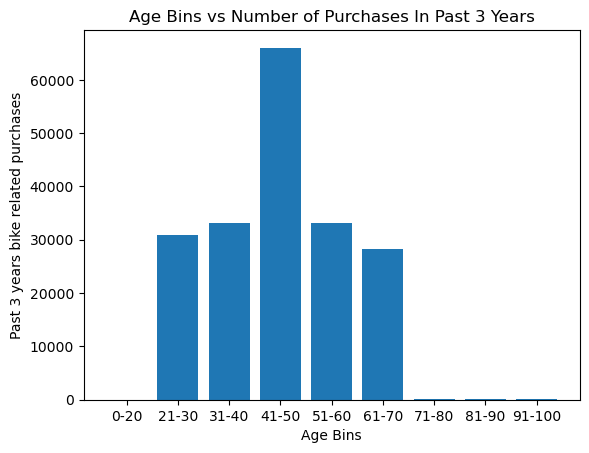

In [76]:
plt.bar(age_vs_purchase.index, age_vs_purchase.values)
plt.xlabel('Age Bins')
plt.ylabel('Past 3 years bike related purchases')
plt.title('Age Bins vs Number of Purchases In Past 3 Years')
plt.show()

In [100]:
# Filter the data to include only major performers
N = 5  # Number of major performers to include
major_performers = age_vs_purchase.nlargest(N)

# Calculate the sum of purchases for the "Others" category
other_purchases = age_vs_purchase.drop(major_performers.index).sum()

# Combine major performers and "Others" into a single series
age_vs_purchase = pd.concat([major_performers, pd.Series(other_purchases, index=['Others'])])


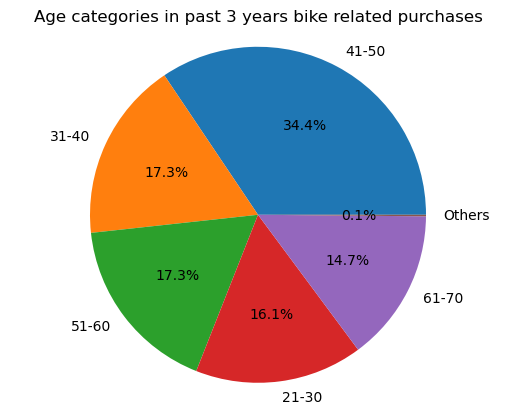

In [110]:
# Create a pie chart with major performers and "Others"
plt.pie(age_vs_purchase, labels=age_vs_purchase.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Age categories in past 3 years bike related purchases')
plt.show()

In [147]:
NewCustomer = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="NewCustomerList",header=1,dtype={'DOB': 'datetime64[ns]'})
NewCustomer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [148]:
#Converting DOB to ages
NewCustomer['age'] = (pd.Timestamp('now') - NewCustomer['DOB']).astype('<m8[Y]')

NewCustomer['age'].isnull().sum()

17

In [149]:
#checking the max value
NewCustomer['age'].min()

21.0

In [150]:
#Removing the missing dob values
NewCustomer = NewCustomer.dropna(subset=['age'])

In [151]:
#Categorising ages to bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
NewCustomer['age_bin'] = pd.cut(NewCustomer['age'], bins=bins, labels=labels)

In [155]:
# Count the occurrences of each age bin
age_bin_counts = NewCustomer.groupby('age_bin').size()

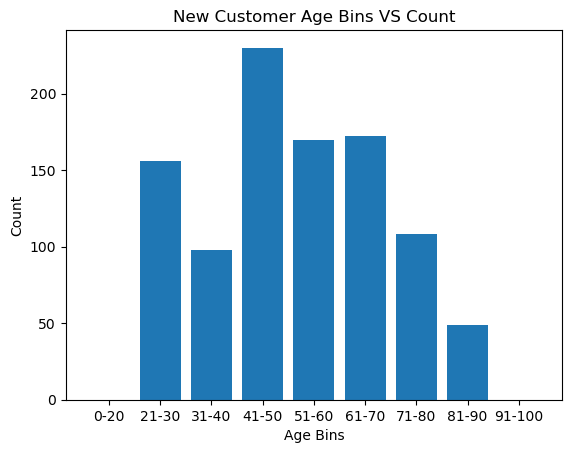

In [157]:
# Create a bar chart for age bins and their counts
plt.bar(age_bin_counts.index, age_bin_counts.values)
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('New Customer Age Bins VS Count')
plt.show()